In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '../data/Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path)

In [3]:
df[:5]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
# Cria novas colunas de data/hora
df['day_of_week'] = df['transaction_date'].dt.day_name()
df['hour_of_day'] = df['transaction_time'].apply(lambda x: x.hour)

# Cria nova coluna com o valor total 
df['total_value'] = df['transaction_qty'] * df['unit_price']

In [5]:
df[:5]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,day_of_week,hour_of_day,total_value
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,7,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,7,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,7,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,7,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,7,6.2


In [6]:
# Lista todas as localidades únicas
store_locations = df['store_location'].unique()

# Define um dicionário de cores para cada localidade de loja
color_palette = sns.color_palette("muted", len(store_locations))
color_dict = dict(zip(store_locations, color_palette))

## Distribuição do Valor de Vendas ao Longo do Dia por Localidade de Loja

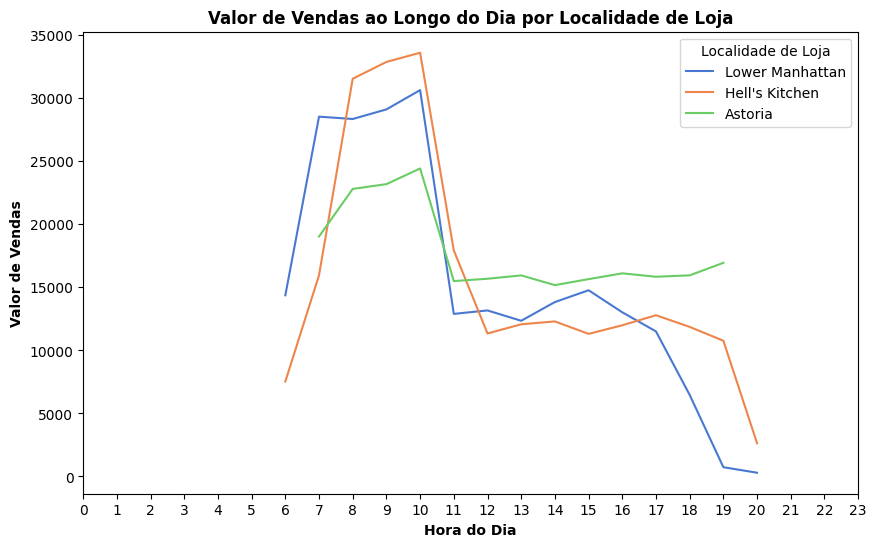

In [7]:
# Cria uma nova figura
plt.figure(figsize=(10, 6))

# Itera sobre cada localidade e plotar as vendas ao longo do dia
for location in store_locations:
    # Filtra os dados pela localidade atual
    df_location = df[df['store_location'] == location]
    
    # Calcula o número de vendas por hora do dia
    sales_by_hour = df_location.groupby('hour_of_day')['total_value'].sum()
    
    # Plota a linha para a localidade atual
    sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, label=location, color=color_dict[location])

# Adiciona detalhes ao gráfico
plt.xlabel('Hora do Dia', fontweight='bold')
plt.ylabel('Valor de Vendas', fontweight='bold')
plt.title('Valor de Vendas ao Longo do Dia por Localidade de Loja', fontweight='bold')
plt.xticks(range(24))
plt.legend(title='Localidade de Loja')
plt.show()

#### Observação:
- As localidade de lojas tem picos de valor de vendas com horário similar: 8h às 10h

## Distribuição do Valor de Vendas ao Longo da Semana por Localidade de Loja

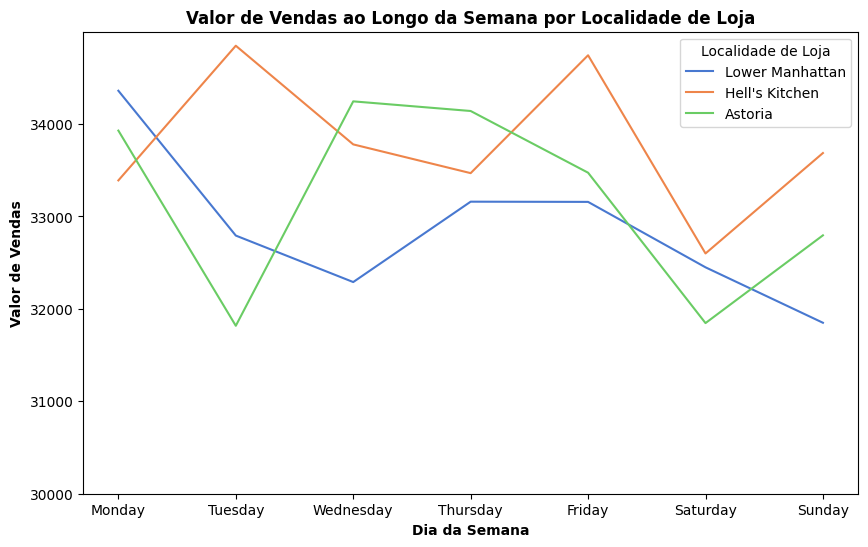

In [8]:
# Cria uma nova figura
plt.figure(figsize=(10, 6))

# Itera sobre cada localidade e plotar as vendas ao longo da semana
for location in store_locations:
    # Filtra os dados pela localidade atual
    df_location = df[df['store_location'] == location]
    
    # Calcula o número de vendas por dia da semana
    sales_by_day = df_location.groupby('day_of_week')['total_value'].sum()
    sales_by_day = sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    # Plota a linha para a localidade atual
    sns.lineplot(x=sales_by_day.index, y=sales_by_day.values, label=location, color=color_dict[location])

# Adiciona detalhes ao gráfico
plt.xlabel('Dia da Semana', fontweight='bold')
plt.ylabel('Valor de Vendas', fontweight='bold')
plt.title('Valor de Vendas ao Longo da Semana por Localidade de Loja', fontweight='bold')
plt.legend(title='Localidade de Loja')
plt.ylim(30000, None) 
plt.show()

#### Observação:
- As localidade de lojas tem picos de valor de vendas em dias distintos:
  - Lower Manhattan : Segunda
  - Hell's Kitchen : Terça e Sexta
  - Astoria : Quarta e Quinta

## Distribuição do Valor de Vendas ao Longo do Tempo por Localidade de Loja

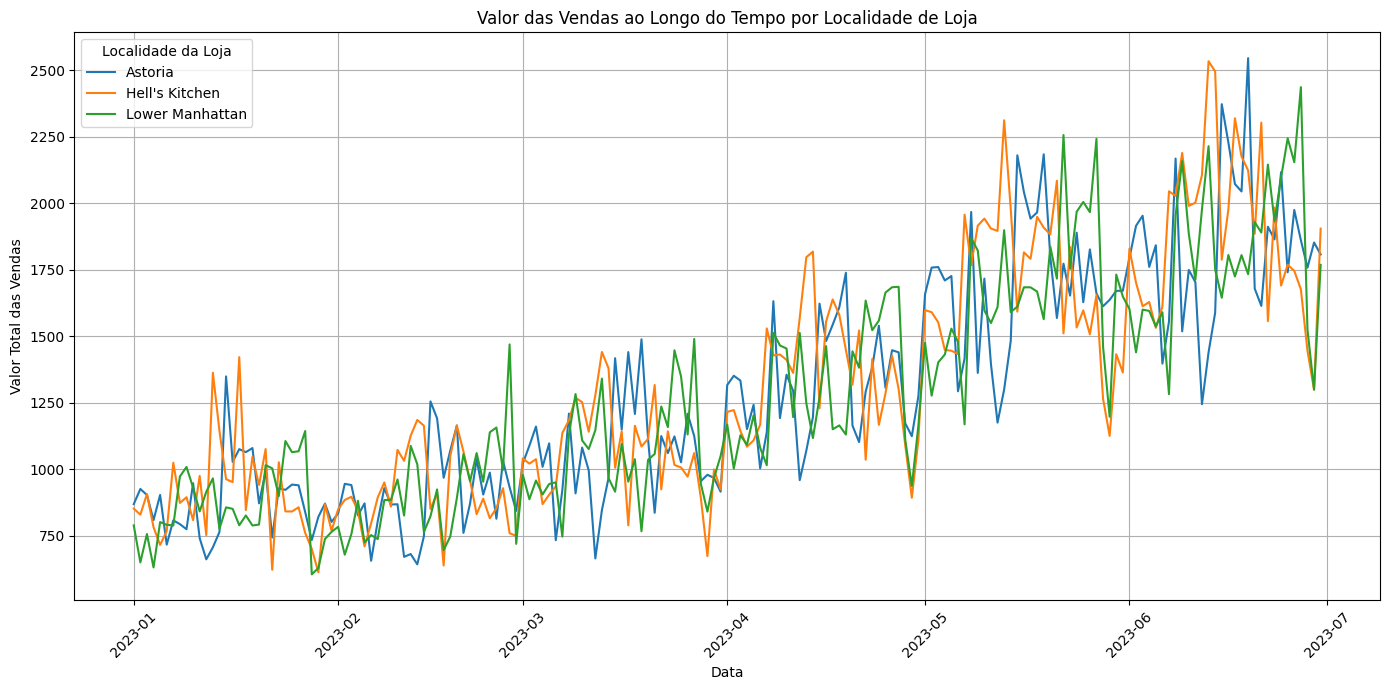

In [9]:
# Agrupa os dados por data e localidade de loja, somando os valores totais das vendas
grouped_df = df.groupby(['transaction_date', 'store_location'])['total_value'].sum().reset_index()

# Pivota os dados para que cada localidade de loja tenha sua própria coluna
pivot_df = grouped_df.pivot(index='transaction_date', columns='store_location', values='total_value')

# Plota os dados
plt.figure(figsize=(14, 7))
for store in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[store], label=store)

plt.title('Valor das Vendas ao Longo do Tempo por Localidade de Loja')
plt.xlabel('Data')
plt.ylabel('Valor Total das Vendas')
plt.legend(title='Localidade da Loja')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observação:
- O valor em vendas aumentou com o passar do tempo

## Distribuição da Quantidade de Vendas ao Longo do Tempo por Localidade de Loja

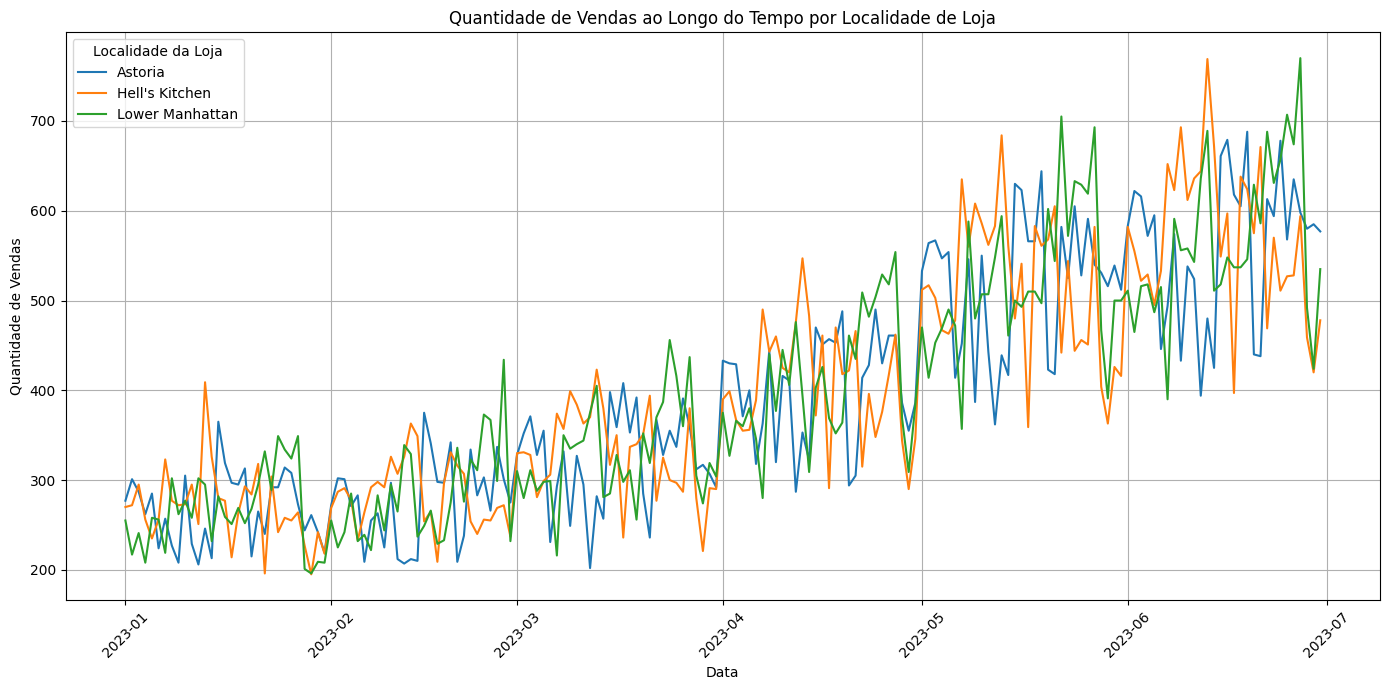

In [10]:
# Agrupa os dados por data e localidade de loja, somando as quantidades das vendas
grouped_qty_df = df.groupby(['transaction_date', 'store_location'])['transaction_qty'].sum().reset_index()

# Pivota os dados para que cada localidade de loja tenha sua própria coluna
pivot_qty_df = grouped_qty_df.pivot(index='transaction_date', columns='store_location', values='transaction_qty')

# Plota os dados
plt.figure(figsize=(14, 7))
for store in pivot_qty_df.columns:
    plt.plot(pivot_qty_df.index, pivot_qty_df[store], label=store)

plt.title('Quantidade de Vendas ao Longo do Tempo por Localidade de Loja')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Localidade da Loja')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observação:
- A quantidade de vendas aumento com o tempo

## Distribuição da Média de Quantidade de Itens por Transação ao Longo do Tempo por Localidade de Loja

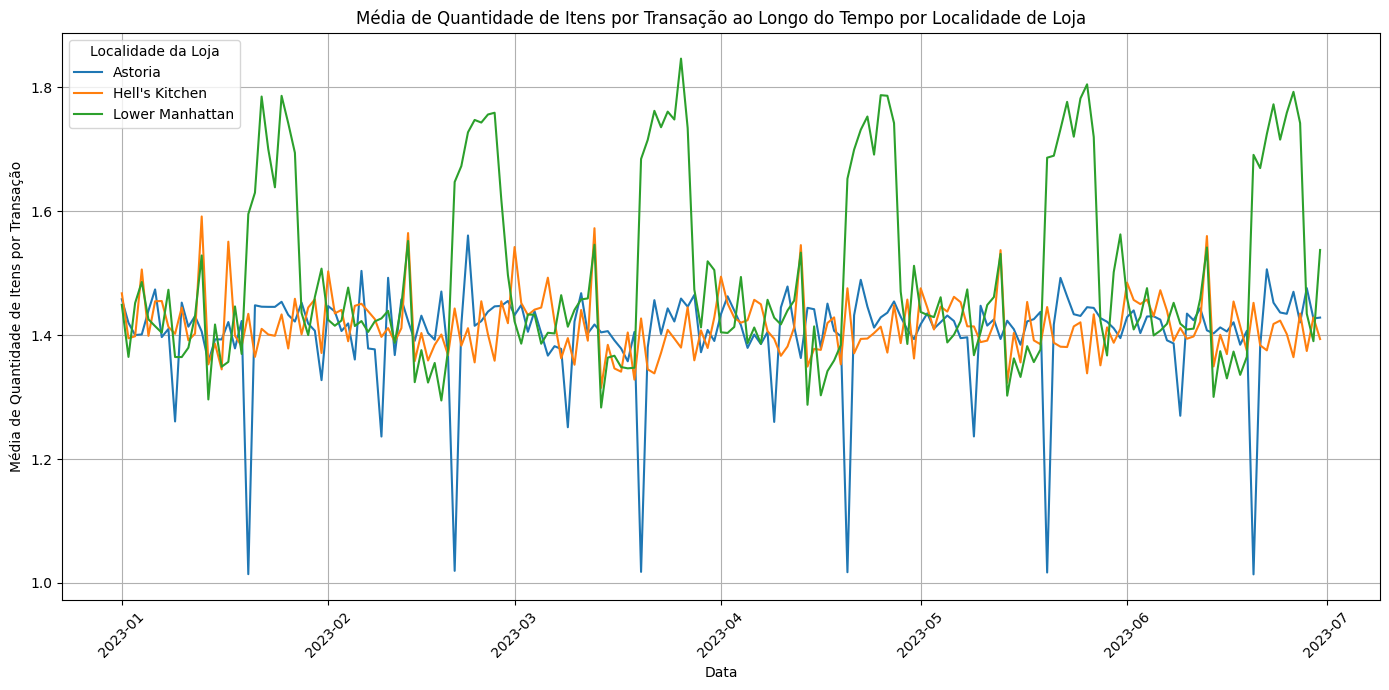

In [11]:
# Agrupa os dados por data e localidade de loja, somando os valores totais das vendas
grouped_df = df.groupby(['transaction_date', 'store_location'])['transaction_qty'].mean().reset_index()

# Pivota os dados para que cada localidade de loja tenha sua própria coluna
pivot_df = grouped_df.pivot(index='transaction_date', columns='store_location', values='transaction_qty')

# Plota os dados
plt.figure(figsize=(14, 7))
for store in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[store], label=store)

plt.title('Média de Quantidade de Itens por Transação ao Longo do Tempo por Localidade de Loja')
plt.xlabel('Data')
plt.ylabel('Média de Quantidade de Itens por Transação')
plt.legend(title='Localidade da Loja')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observação:
- A média de quantidade de itens por transação se manteve